In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas

In [ ]:
import matplotlib.colors as mcolors
tableau_colors = list(mcolors.TABLEAU_COLORS.values())

##### data exploration

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# build dataframe
df = pandas.DataFrame(data = iris.data, columns = iris.feature_names)
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# keep only first two feature columns
df = df.drop(columns = ["petal length (cm)", "petal width (cm)"])
df

,sepal length (cm),sepal width (cm),species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [ ]:
# keep only two target classes
df = df[df["species"].isin([0,2])]
df

,sepal length (cm),sepal width (cm),species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


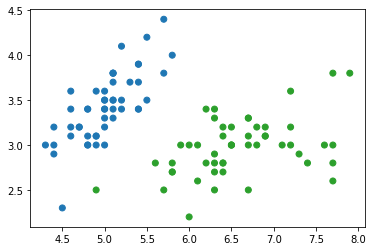

In [ ]:
colors = df["species"].apply(lambda x: tableau_colors[x])
plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c = colors)
plt.show()

##### data preprocessing

In [ ]:
X = numpy.array(df.iloc[:, :2])
y = numpy.array(df.iloc[:,2])

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(X_train)
# print(X_test)

##### Logistic regression

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression(random_state = 0)
logistic_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = logistic_clf.predict(X_test)
# print(numpy.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[13  0]
 [ 0 12]]


1.0

##### Support Vector Machine

In [ ]:
# Training the Logistic Regression model on the Training set
from sklearn.svm import SVC
svc = SVC(random_state = 0, kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = svc.predict(X_test)
# print(numpy.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[13  0]
 [ 0 12]]


1.0

##### Compare classifiers

In [ ]:
# Retrieve the model parameters.
b = logistic_clf.intercept_[0]
w1, w2 = logistic_clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c1 = -b/w2
m1 = -w1/w2

# Retrieve the model parameters.
b = svc.intercept_[0]
w1, w2 = svc.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c2 = -b/w2
m2 = -w1/w2

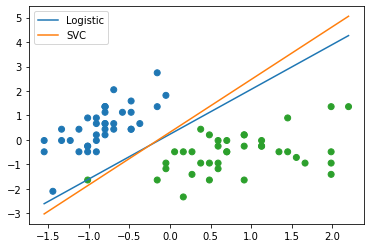

In [ ]:
colors = [tableau_colors[i] for i in y_train]
plt.scatter(X_train[:,0], X_train[:,1], c = colors)
x = numpy.linspace(X_train[:,0].min(), X_train[:,0].max(), 100)
y1 = m1*x+c1
y2 = m2*x+c2
plt.plot(x, y1, label = 'Logistic')
plt.plot(x, y2, label = 'SVC')
plt.legend()